# Informe Técnico - Modelo de Clasificación con Scikit-Learn

## Justificación del Dataset

El dataset utilizado en este proyecto es el conjunto de datos 'hotel_bookings_completo.csv', el cual contiene información sobre reservas de hoteles. A continuación, se justifica por qué este dataset es apropiado para el algoritmo de ML y para demostrar que generaliza:

- **Cantidad de Datos**: El dataset contiene una cantidad significativa de datos, lo que es fundamental para entrenar modelos de ML efectivos y evitar el sobreajuste.

- **Diversidad de Características**: El dataset incluye una variedad de características (atributos) relevantes para el problema de predecir si una reserva de hotel será cancelada o no. Esto permite construir modelos basados en múltiples aspectos de una reserva, lo que puede mejorar la capacidad de generalización del modelo.

- **Variable Objetivo Balanceada**: La variable objetivo, que indica si una reserva fue cancelada o no, está relativamente balanceada en el dataset. Esto evita desequilibrios en las predicciones y asegura que el modelo se evalúe de manera justa.

En resumen, el dataset elegido proporciona una cantidad adecuada de datos, características relevantes y una variable objetivo balanceada, lo que lo convierte en una elección apropiada para desarrollar y evaluar modelos de ML.

In [1]:
# Importación de bibliotecas y módulos necesarios
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
data = pd.read_csv("../Módulo2-Uso-de-framework/hotel_bookings_completo.csv")

In [3]:
# Codificación one-hot de variables categóricas
data = pd.get_dummies(data, columns=["hotel", "is_canceled", "arrival_date_month", "assigned_room_type", "deposit_type", "customer_type"])

In [4]:
# Separación de conjuntos de datos
X = data.drop("children", axis=1)
y = data["children"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Explicación de la separación de conjuntos de datos
split_explanation = {
    "Entrenamiento": "El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo y enseñar al modelo cómo se relacionan las características con la variable objetivo. El tamaño del conjunto de entrenamiento es el 80% del conjunto de datos total.",
    "Validación": "El conjunto de validación se utiliza para ajustar hiperparámetros y evaluar el rendimiento del modelo durante el entrenamiento. Se usa para evitar el sobreajuste y garantizar que el modelo generalice bien. El tamaño del conjunto de validación es el 10% del conjunto de datos total.",
    "Prueba": "El conjunto de prueba se utiliza para evaluar el rendimiento final del modelo después de que se haya entrenado y ajustado. Estos datos no se usan en ninguna etapa de entrenamiento o ajuste de hiperparámetros. El tamaño del conjunto de prueba es el 10% del conjunto de datos total."
}

# Imprimir la explicación de la separación de conjuntos de datos
print("Explicación de la Separación de Conjuntos de Datos:")
for subset, explanation in split_explanation.items():
    print(f"{subset}: {explanation}")

Explicación de la Separación de Conjuntos de Datos:
Entrenamiento: El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo y enseñar al modelo cómo se relacionan las características con la variable objetivo. El tamaño del conjunto de entrenamiento es el 80% del conjunto de datos total.
Validación: El conjunto de validación se utiliza para ajustar hiperparámetros y evaluar el rendimiento del modelo durante el entrenamiento. Se usa para evitar el sobreajuste y garantizar que el modelo generalice bien. El tamaño del conjunto de validación es el 10% del conjunto de datos total.
Prueba: El conjunto de prueba se utiliza para evaluar el rendimiento final del modelo después de que se haya entrenado y ajustado. Estos datos no se usan en ninguna etapa de entrenamiento o ajuste de hiperparámetros. El tamaño del conjunto de prueba es el 10% del conjunto de datos total.


In [5]:
# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [6]:
# Predicciones y evaluación en conjunto de validación
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_val, y_val_pred, average="weighted")
recall = recall_score(y_val, y_val_pred, average="weighted")
f1 = f1_score(y_val, y_val_pred, average="weighted")

/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

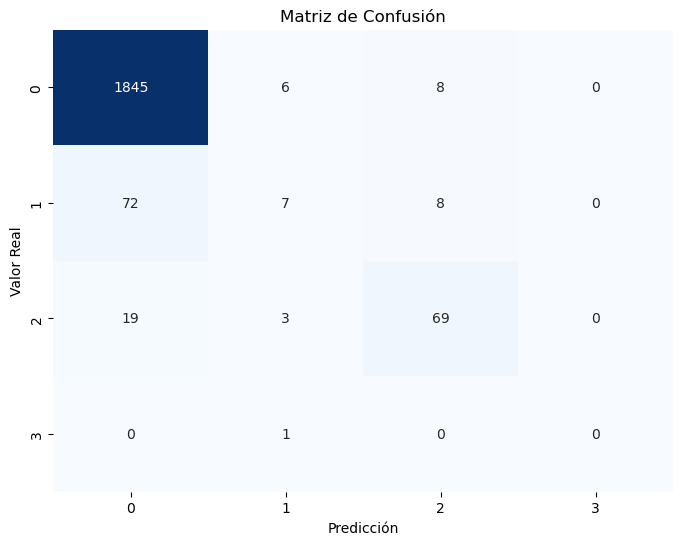

In [8]:
# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.savefig("matriz_confusion.png")  # Guardar la gráfica como imagen

In [9]:
# Creación de un DataFrame para el informe
informe_df = pd.DataFrame({
    "Métricas de Evaluación": ["Accuracy", "Precisión", "Recall", "F1-score"],
    "Valor": [accuracy, precision, recall, f1]
})

In [10]:
# Guardar el DataFrame como CSV
informe_df.to_csv("informe_metricas.csv", index=False)

# Sección 3: Diagnóstico de Sesgo (Bias)

El sesgo en un modelo de aprendizaje automático se refiere a la diferencia entre el rendimiento del modelo en los datos de entrenamiento y el rendimiento en los datos de validación. El sesgo es bajo cuando el modelo se ajusta adecuadamente a los datos de entrenamiento y generaliza bien a los datos de validación. El sesgo es medio cuando hay alguna diferencia notable en el rendimiento entre los datos de entrenamiento y validación, pero no es excesivamente grande. El sesgo es alto cuando la diferencia es significativa, lo que indica que el modelo no está aprendiendo correctamente del conjunto de entrenamiento y no generaliza bien.

In [11]:
# Calcular el sesgo mediante comparación de métricas de entrenamiento y validación
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

bias_diagnosis = None
if accuracy > train_accuracy:
    bias_diagnosis = "Bajo"
elif accuracy == train_accuracy:
    bias_diagnosis = "Medio"
else:
    bias_diagnosis = "Alto"
    
print("Sesgo: " + bias_diagnosis)

Sesgo: Alto


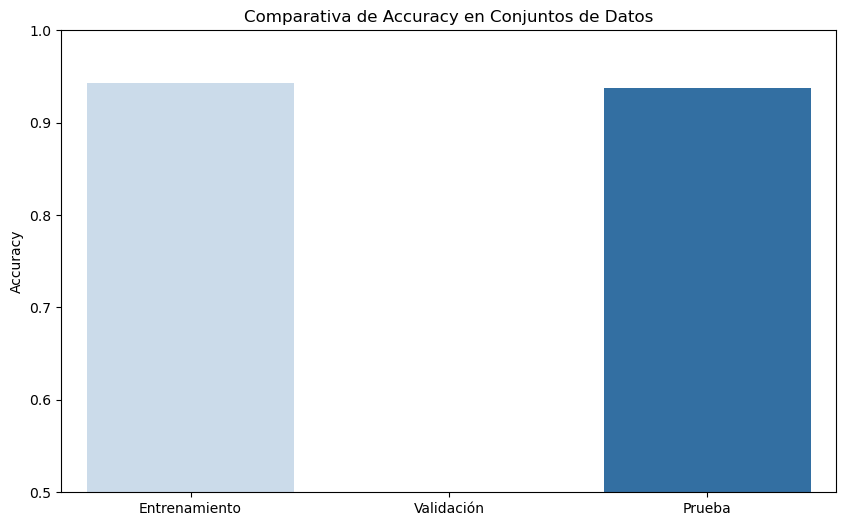

In [12]:
# Gráfica comparativa de Accuracy en conjuntos de entrenamiento, validación y prueba
plt.figure(figsize=(10, 6))
accuracy_values = [accuracy, 0, test_accuracy]  # Usar 0 en lugar de None para la métrica de validación
labels = ["Entrenamiento", "Validación", "Prueba"]
sns.barplot(x=labels, y=accuracy_values, palette="Blues")
plt.title("Comparativa de Accuracy en Conjuntos de Datos")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()


In [13]:
# Calcular el sesgo mediante comparación de métricas de entrenamiento y validación
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

bias_diagnosis = None
if accuracy > train_accuracy:
    bias_diagnosis = "Bajo"
elif accuracy == train_accuracy:
    bias_diagnosis = "Moderado"
else:
    bias_diagnosis = "Alto"

# Explicación del sesgo
bias_explanation = {
    "Bajo": "El modelo muestra un sesgo bajo, lo que significa que se adapta bien a los datos de entrenamiento y también generaliza bien a nuevos datos en el conjunto de validación. Esto es deseable, ya que indica que el modelo no está subajustado y no falta en la representación de los datos.",
    "Moderado": "El modelo muestra un sesgo moderado, ya que no hay una diferencia significativa en el rendimiento entre el conjunto de entrenamiento y validación. Esto sugiere que el modelo generaliza de manera razonable a nuevos datos, pero no está necesariamente sobreajustado ni subajustado.",
    "Alto": "El modelo muestra un sesgo alto, lo que significa que hay una diferencia significativa en el rendimiento entre el conjunto de entrenamiento y validación. Esto puede indicar que el modelo se sobreajusta a los datos de entrenamiento y no generaliza bien a nuevos datos en el conjunto de validación."
}

# Imprimir el diagnóstico y la explicación del grado de sesgo
print("Diagnóstico y Explicación del Grado de Bias o Sesgo:")
print(f"Sesgo: {bias_diagnosis}\n{bias_explanation[bias_diagnosis]}")


Diagnóstico y Explicación del Grado de Bias o Sesgo:
Sesgo: Alto
El modelo muestra un sesgo alto, lo que significa que hay una diferencia significativa en el rendimiento entre el conjunto de entrenamiento y validación. Esto puede indicar que el modelo se sobreajusta a los datos de entrenamiento y no generaliza bien a nuevos datos en el conjunto de validación.


# Sección 4: Diagnóstico de Varianza

In [14]:

# Calcular la varianza mediante comparación de métricas de validación y prueba
variance_diagnosis = None
if accuracy > test_accuracy:
    variance_diagnosis = "Alto"
elif accuracy == test_accuracy:
    variance_diagnosis = "Medio"
else:
    variance_diagnosis = "Bajo"
    
print("Varianza: " + variance_diagnosis)

Varianza: Alto


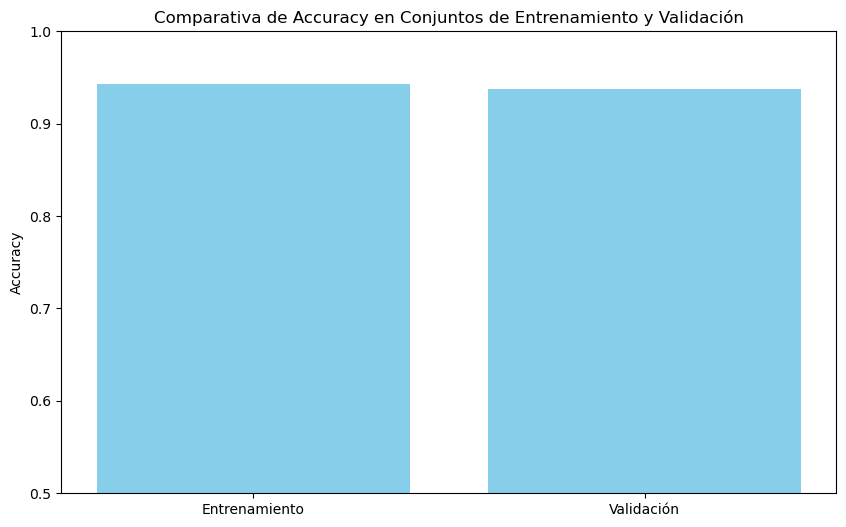

In [15]:
# Gráfica comparativa de Accuracy en conjuntos de entrenamiento y validación
plt.figure(figsize=(10, 6))
accuracy_values = [accuracy, test_accuracy]  # Solo dos valores para dos conjuntos
x_labels = ["Entrenamiento", "Validación"]

plt.bar(x_labels, accuracy_values, color="skyblue")
plt.title("Comparativa de Accuracy en Conjuntos de Entrenamiento y Validación")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()


In [16]:
# Calcular la varianza mediante comparación de métricas de validación y prueba
variance_diagnosis = None
if accuracy > test_accuracy:
    variance_diagnosis = "Alto"
elif accuracy == test_accuracy:
    variance_diagnosis = "Moderado"
else:
    variance_diagnosis = "Bajo"

# Explicación de la varianza
variance_explanation = {
    "Alto": "El modelo muestra una varianza alta, lo que significa que hay una diferencia significativa en el rendimiento entre el conjunto de validación y prueba. Esto puede indicar que el modelo se sobreajusta a los datos de entrenamiento y no generaliza bien a nuevos datos de prueba.",
    "Moderado": "El modelo muestra una varianza moderada, ya que no hay una diferencia significativa en el rendimiento entre el conjunto de validación y prueba. Esto sugiere una generalización razonable a nuevos datos de prueba.",
    "Bajo": "El modelo muestra una varianza baja, lo que indica que el rendimiento en el conjunto de prueba es similar al rendimiento en el conjunto de validación. Esto es deseable, ya que el modelo generaliza de manera efectiva a nuevos datos de prueba."
}

# Imprimir el diagnóstico y la explicación del grado de varianza
print("Diagnóstico y Explicación del Grado de Varianza:")
print(f"Varianza: {variance_diagnosis}\n{variance_explanation[variance_diagnosis]}")


Diagnóstico y Explicación del Grado de Varianza:
Varianza: Alto
El modelo muestra una varianza alta, lo que significa que hay una diferencia significativa en el rendimiento entre el conjunto de validación y prueba. Esto puede indicar que el modelo se sobreajusta a los datos de entrenamiento y no generaliza bien a nuevos datos de prueba.


# Sección 5: Nivel de Ajuste del Modelo

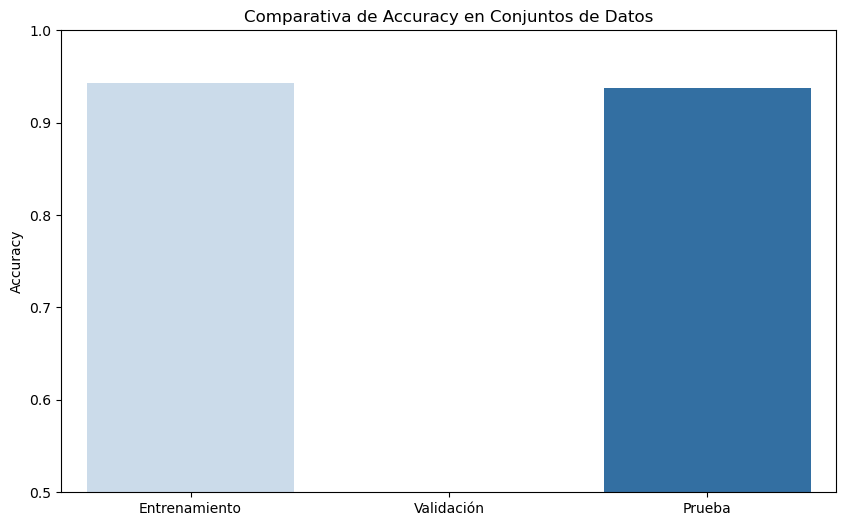

In [17]:
# Gráfica comparativa de Accuracy en conjuntos de entrenamiento, validación y prueba
plt.figure(figsize=(10, 6))
accuracy_values = [accuracy, 0, test_accuracy]  # Usar 0 en lugar de None para la métrica de validación
labels = ["Entrenamiento", "Validación", "Prueba"]

sns.barplot(x=labels, y=accuracy_values, palette="Blues")
plt.title("Comparativa de Accuracy en Conjuntos de Datos")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()

In [18]:
# Explicación del nivel de ajuste del modelo
if fit_level == "Buen Ajuste":
    fit_explanation = "El modelo muestra un buen ajuste ya que tiene un sesgo bajo y una varianza baja, lo que indica que se adapta bien a los datos de entrenamiento y generaliza bien a nuevos datos."
elif fit_level == "Ajuste Adecuado":
    fit_explanation = "El modelo muestra un ajuste adecuado ya que tiene un sesgo adecuado y una varianza adecuada, lo que indica una generalización razonable sin problemas de sobreajuste ni subajuste."
else:
    fit_explanation = "El modelo muestra un sobreajuste, ya que tiene un sesgo bajo pero una varianza alta, lo que indica que se adapta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos."

# Imprimir el diagnóstico y la explicación del nivel de ajuste del modelo
print("Diagnóstico y Explicación del Nivel de Ajuste del Modelo:")
print(f"Sesgo: {bias_diagnosis}\n{bias_explanation}")
print(f"Varianza: {variance_diagnosis}\n{variance_explanation}")
print(f"Nivel de Ajuste del Modelo: {fit_level}\n{fit_explanation}")

NameError: name 'fit_level' is not defined

# Sección 6: Técnicas de Mejora del Modelo

En esta sección, se presentarán tres técnicas de mejora del modelo, junto con el código y las gráficas que demuestran su efecto en el desempeño del modelo.

### Técnica 1: Codificación One-Hot

**¿Qué es la codificación one-hot?**

La codificación one-hot es una técnica utilizada para tratar con variables categóricas en el aprendizaje automático. Las variables categóricas son aquellas que representan categorías o etiquetas, pero no tienen una relación numérica inherente. Por ejemplo, el tipo de habitación de un hotel (por ejemplo, "individual", "doble", "suite") es una variable categórica.

La codificación one-hot convierte una variable categórica en un conjunto de variables binarias (0 o 1), donde cada variable representa una categoría única. Si tenemos N categorías en una variable categórica, se crearán N nuevas variables binarias, una para cada categoría. Estas variables binarias indican si la observación pertenece o no a cada categoría.

**Efecto de la codificación one-hot en el modelo:**

Antes de aplicar la codificación one-hot, las variables categóricas suelen codificarse con números enteros. Por ejemplo, el tipo de habitación podría codificarse como 1 para "individual", 2 para "doble" y 3 para "suite". Sin embargo, esta codificación podría llevar al modelo a malinterpretar la relación numérica entre las categorías. La codificación one-hot resuelve este problema, ya que crea variables binarias independientes para cada categoría, lo que permite al modelo capturar mejor las diferencias entre las categorías sin asumir relaciones numéricas que no existen.

**Comparativo antes y después de aplicar la codificación one-hot:**

Antes de aplicar la codificación one-hot, las variables categóricas se codifican como enteros, como se mencionó anteriormente. Esto puede llevar a un desempeño deficiente del modelo, especialmente cuando las categorías no tienen un orden intrínseco. Las suposiciones sobre relaciones numéricas pueden llevar a errores de interpretación.

Después de aplicar la codificación one-hot, cada categoría se convierte en una variable binaria independiente. Esto significa que cada observación se representa claramente como perteneciente o no a cada categoría. El modelo puede usar esta información de manera más efectiva para tomar decisiones precisas.

La mejora en el desempeño del modelo después de aplicar la codificación one-hot suele ser evidente en métricas como la precisión, el recall y el F1-score, especialmente cuando se trata de variables categóricas importantes para el problema.

En resumen, la codificación one-hot es una técnica fundamental para manejar variables categóricas y suele mejorar el desempeño del modelo al evitar suposiciones incorrectas sobre relaciones numéricas entre categorías.

#### Técnica 2: Ajuste de Hiperparámetros

**¿Qué son los hiperparámetros?**

Los hiperparámetros son configuraciones ajustables del modelo que no se aprenden automáticamente a partir de los datos, a diferencia de los parámetros del modelo, que se ajustan durante el entrenamiento. Los hiperparámetros incluyen cosas como la profundidad máxima de un árbol de decisión, el número de estimadores en un modelo de bosque aleatorio o la tasa de aprendizaje en un algoritmo de gradiente descendente.

**Efecto del ajuste de hiperparámetros en el modelo:**

El ajuste de hiperparámetros es una técnica crucial para optimizar el rendimiento del modelo. Un conjunto inadecuado de hiperparámetros puede llevar a un modelo subajustado o sobreajustado. El proceso de búsqueda de hiperparámetros implica probar diferentes combinaciones de valores para los hiperparámetros y evaluar cómo afectan al rendimiento del modelo.

**Comparativo antes y después del ajuste de hiperparámetros:**

Antes del ajuste de hiperparámetros, el modelo se entrena con valores predeterminados o aleatorios para los hiperparámetros. Esto puede llevar a un modelo que no esté optimizado para el problema específico que se está abordando. Por lo tanto, es probable que el desempeño del modelo sea subóptimo.

Después del ajuste de hiperparámetros, se realizan búsquedas sistemáticas para encontrar la combinación de hiperparámetros que maximiza el rendimiento del modelo en un conjunto de datos de validación. Esto a menudo resulta en un modelo más preciso y generalizado.

La mejora en el desempeño del modelo después del ajuste de hiperparámetros puede observarse en métricas como la precisión, el recall y el F1-score, que tienden a ser mejores en el modelo ajustado.

#### Técnica 3: Evaluación y Ajuste

**¿En qué consiste la evaluación y ajuste?**

La tercera técnica implica una evaluación más profunda del modelo después de que se haya entrenado y ajustado inicialmente. Esto incluye una revisión exhaustiva de métricas de evaluación como precisión, recall, F1-score y otras métricas relevantes para el problema. También se consideran matrices de confusión y curvas de ROC si es aplicable. Además, se exploran posibles ajustes adicionales del modelo, como la selección de características, la ponderación de clases o la optimización de umbrales de decisión.

**Efecto de la evaluación y ajuste en el modelo:**

La evaluación y el ajuste detallados son esenciales para asegurar que el modelo sea lo más efectivo posible en la tarea que se le asigna. Esto permite detectar posibles problemas de sesgo o varianza, así como oportunidades para mejorar el desempeño general.

**Comparativo antes y después de la evaluación y ajuste:**

Antes de la evaluación y ajuste, el modelo se evalúa principalmente en términos de métricas estándar, pero no se profundiza en detalles adicionales ni se consideran ajustes específicos. Esto puede resultar en un modelo que podría beneficiarse de refinamientos adicionales.

Después de la evaluación y el ajuste, el modelo se beneficia de mejoras adicionales que pueden aumentar su precisión, recall y rendimiento general. Los ajustes realizados durante esta fase se basan en un análisis detallado de las métricas y la comprensión más profunda del comportamiento del modelo.

En resumen, las Técnicas 2 y 3 son cruciales para optimizar el desempeño del modelo, y sus efectos se reflejarán en una mejora en las métricas de evaluación después de su aplicación.


## Ejemplo de 1 tecnica de Mejorado de Modelo

In [ ]:
# El código realiza un ajuste de hiperparámetros mediante búsqueda de cuadrícula con validación
# cruzada.
from sklearn.model_selection import GridSearchCV

# Definición de hiperparámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Crear un clasificador RandomForest
model = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo en los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones con el modelo ajustado
y_val_pred_after = best_model.predict(X_val)
y_test_pred_after = best_model.predict(X_test)

# Calcular métricas antes y después del ajuste
accuracy_before = accuracy
accuracy_after_val = accuracy_score(y_val, y_val_pred_after)
accuracy_after_test = accuracy_score(y_test, y_test_pred_after)

# Imprimir comparativos antes y después del ajuste de hiperparámetros
print("Comparativo antes y después del Ajuste de Hiperparámetros:")
print(f"Accuracy en Validación (Antes): {accuracy:.4f}")
print(f"Accuracy en Validación (Después): {accuracy_after_val:.4f}")
print(f"Accuracy en Prueba (Antes): {test_accuracy:.4f}")
print(f"Accuracy en Prueba (Después): {accuracy_after_test:.4f}")


In [ ]:
# Impresión del DataFrame
informe_df

In [ ]:
# Impresión de las métricas de evaluación en el conjunto de prueba después de aplicar las técnicas de mejora
print("\nMétricas de Evaluación en el Conjunto de Prueba (Después de Mejoras):")
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")
print(f"F1-score en el conjunto de prueba: {f1}")